In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [5]:
# Data Acquisition
df_asteroids = pd.read_csv("C:\\Practice-dataset\\dataset.csv")

C:\Users\MIS\AppData\Local\Temp\ipykernel_23720\1562532591.py:2: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_asteroids = pd.read_csv("C:\\Practice-dataset\\dataset.csv")


# Data Exploration

Column Descriptions provided with the dataset:

* SPK-ID: Object primary SPK-ID
* Object ID: Object internal database ID
* Object fullname: Object full name/designation
* pdes: Object primary designation
* name: Object IAU name
* NEO: Near-Earth Object (NEO) flag
* PHA: Potentially Hazardous Asteroid (PHA) flag
* H: Absolute magnitude parameter
* Diameter: object diameter (from equivalent sphere) km Unit
* Albedo: Geometric albedo
* Diameter_sigma: 1-sigma uncertainty in object diameter km Unit
* Orbit_id: Orbit solution ID
* Epoch: Epoch of osculation in modified Julian day form
* Equinox: Equinox of reference frame
* e: Eccentricity
* a: Semi-major axis au Unit
* q: perihelion distance au Unit
* i: inclination; angle with respect to x-y ecliptic plane
* tp: Time of perihelion passage TDB Unit
* moid_ld: Earth Minimum Orbit Intersection Distance au Unit

##
Going to do prediction analysis of
<b> Potential Hazard Prediction (PHA): </b>

* Objective: Identify potentially hazardous asteroids.
* Impact: High, as it can contribute to planetary defense and risk assessment.
* Feasibility: High, given the availability of physical and orbital parameters.

#### Preliminary Exploration
info(), describe(), shape

In [331]:
df_asteroids.shape

(958524, 45)

In [332]:
df_asteroids.columns

Index(['id', 'spkid', 'full_name', 'pdes', 'name', 'prefix', 'neo', 'pha', 'H',
       'diameter', 'albedo', 'diameter_sigma', 'orbit_id', 'epoch',
       'epoch_mjd', 'epoch_cal', 'equinox', 'e', 'a', 'q', 'i', 'om', 'w',
       'ma', 'ad', 'n', 'tp', 'tp_cal', 'per', 'per_y', 'moid', 'moid_ld',
       'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w',
       'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'class',
       'rms'],
      dtype='object')

In [333]:
df_asteroids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958524 entries, 0 to 958523
Data columns (total 45 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              958524 non-null  object 
 1   spkid           958524 non-null  int64  
 2   full_name       958524 non-null  object 
 3   pdes            958524 non-null  object 
 4   name            22064 non-null   object 
 5   prefix          18 non-null      object 
 6   neo             958520 non-null  object 
 7   pha             938603 non-null  object 
 8   H               952261 non-null  float64
 9   diameter        136209 non-null  float64
 10  albedo          135103 non-null  float64
 11  diameter_sigma  136081 non-null  float64
 12  orbit_id        958524 non-null  object 
 13  epoch           958524 non-null  float64
 14  epoch_mjd       958524 non-null  int64  
 15  epoch_cal       958524 non-null  float64
 16  equinox         958524 non-null  object 
 17  e         

##### As we can see many columns have non-null values so will deal with that later on

In [334]:
df_asteroids.describe()

,spkid,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,e,a,...,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms
count,9.585240e+05,952261.000000,136209.000000,135103.000000,136081.000000,9.585240e+05,958524.000000,9.585240e+05,958524.000000,958524.000000,...,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.385980e+05,9.386020e+05,9.386020e+05,9.385980e+05,958522.000000
mean,3.810114e+06,16.906411,5.506429,0.130627,0.479184,2.458869e+06,58868.781950,2.019693e+07,0.156116,2.902143,...,1.982929e+01,1.168449e+00,5.310234e+00,1.370062e+06,1.369977e+06,2.131453e+01,5.060221e-02,4.312780e+08,8.525815e+04,0.561153
std,6.831541e+06,1.790405,9.425164,0.110323,0.782895,7.016716e+02,701.671573,1.930354e+04,0.092643,39.719503,...,2.903785e+03,1.282231e+02,1.333381e+03,9.158996e+08,9.158991e+08,7.197034e+03,9.814953e+00,2.953046e+11,2.767681e+07,2.745700
min,2.000001e+06,-1.100000,0.002500,0.001000,0.000500,2.425052e+06,25051.000000,1.927062e+07,0.000000,-14702.447872,...,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,0.000000
25%,2.239632e+06,16.100000,2.780000,0.053000,0.180000,2.459000e+06,59000.000000,2.020053e+07,0.092193,2.387835,...,1.462000e-07,6.095900e-06,3.619400e-05,5.755000e-05,2.573700e-05,2.340900e-08,2.768800e-09,1.110900e-04,1.794500e-05,0.518040
50%,2.479262e+06,16.900000,3.972000,0.079000,0.332000,2.459000e+06,59000.000000,2.020053e+07,0.145002,2.646969,...,2.271900e-07,8.688800e-06,6.642550e-05,1.047100e-04,4.900100e-05,4.359000e-08,4.638000e-09,2.230800e-04,3.501700e-05,0.566280
75%,3.752518e+06,17.714000,5.765000,0.190000,0.620000,2.459000e+06,59000.000000,2.020053e+07,0.200650,3.001932,...,6.583200e-07,1.591500e-05,1.609775e-04,3.114400e-04,1.718900e-04,1.196600e-07,1.124000e-08,8.139600e-04,9.775475e-05,0.613927
max,5.401723e+07,33.200000,939.400000,1.000000,140.000000,2.459000e+06,59000.000000,2.020053e+07,1.855356,33488.895955,...,1.015000e+06,5.533000e+04,1.199100e+06,8.845100e+11,8.845100e+11,5.509700e+06,7.698800e+03,2.853100e+14,1.910700e+10,2686.600000


##### As we can observe from standard deviation there are some outliers in the dataset

## Data Filtering

In [335]:
df_asteroids.isnull().sum() * 100 / len(df_asteroids)

id                 0.000000
spkid              0.000000
full_name          0.000000
pdes               0.000000
name              97.698128
prefix            99.998122
neo                0.000417
pha                2.078300
H                  0.653400
diameter          85.789714
albedo            85.905100
diameter_sigma    85.803068
orbit_id           0.000000
epoch              0.000000
epoch_mjd          0.000000
epoch_cal          0.000000
equinox            0.000000
e                  0.000000
a                  0.000000
q                  0.000000
i                  0.000000
om                 0.000000
w                  0.000000
ma                 0.000104
ad                 0.000417
n                  0.000000
tp                 0.000000
tp_cal             0.000000
per                0.000417
per_y              0.000104
moid               2.078300
moid_ld            0.013250
sigma_e            2.078404
sigma_a            2.078404
sigma_q            2.078404
sigma_i            2

In [336]:
# Calculate the percentage of missing values for each column
missing_values_percentage = df_asteroids.isnull().sum() * 100 / len(df_asteroids)

# Filter columns with missing values
missing_value_columns = missing_values_percentage[missing_values_percentage > 0]

# Display the columns with missing values and their percentages
print(missing_value_columns)

name              97.698128
prefix            99.998122
neo                0.000417
pha                2.078300
H                  0.653400
diameter          85.789714
albedo            85.905100
diameter_sigma    85.803068
ma                 0.000104
ad                 0.000417
per                0.000417
per_y              0.000104
moid               2.078300
moid_ld            0.013250
sigma_e            2.078404
sigma_a            2.078404
sigma_q            2.078404
sigma_i            2.078404
sigma_om           2.078404
sigma_w            2.078404
sigma_ma           2.078404
sigma_ad           2.078821
sigma_n            2.078404
sigma_tp           2.078404
sigma_per          2.078821
rms                0.000209
dtype: float64


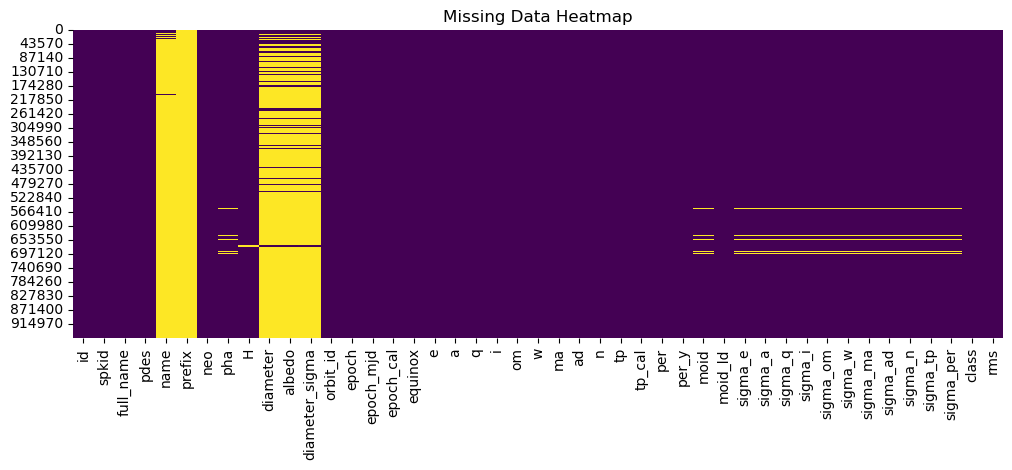

In [337]:
# Visualize the pattern of missing data
plt.figure(figsize=(12, 4))
sns.heatmap(df_asteroids.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

<b>MCAR (Missing Completely at Random)</b>
* prefix: Almost entirely missing values.
* name: Many missing values, randomly scattered.
  
<b>MAR (Missing at Random)</b>
* diameter, albedo, diameter_sigma: Missing values likely related to measurement challenges.
* moid_ld: Missing values possibly due to incomplete orbit calculations.
  
<b>MNAR (Missing Not at Random)</b>
* pha: Few missing values, potentially related to observation difficulties.
* H: Few missing values, possibly related to object brightness and observation difficulty.

C:\Users\MIS\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


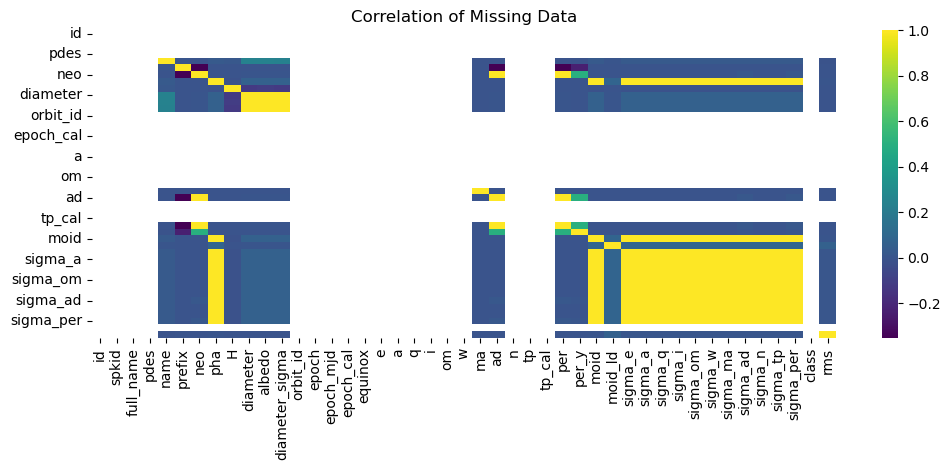

In [338]:
# Check the correlation of missing values with other columns
missing_data = df_asteroids.isnull().astype(int)
correlations = missing_data.corr()

# Display the correlation heatmap
plt.figure(figsize=(12, 4))
sns.heatmap(correlations, annot=True, cmap='viridis')
plt.title("Correlation of Missing Data")
plt.show()

<b>Strong Correlation Among Missing Values:</b>

* diameter, albedo, diameter_sigma: These columns show a strong positive correlation in their missing data, indicating that if one value is missing, the others are likely missing as well. This suggests a pattern where the absence of these physical parameters is interrelated, likely due to the same measurement difficulties.

<b>Moderate Correlation:</b>

* moid_ld and orbital parameters: Moderate correlation suggests interconnected missing data in orbit-related variables.

<b>Weak/No Correlation:</b>

* name, prefix: These columns show weak or no correlation with others, indicating independent missing data patterns.

In [339]:
# storing missing value features into another dataset
null_columns = df_asteroids.columns[df_asteroids.isnull().any()].tolist()

In [340]:
# Dropping null columns which are not required for our prediction so for that, let's first prepare a list of essential columns
essential_columns = ['pha', 'H', 'diameter', 'albedo', 'e', 'a', 'q', 'i', 'moid_ld']

In [341]:
# Droping columns with null values that are not essential using pair-wise omission
columns_to_drop = [col for col in null_columns if col not in essential_columns]
asteroids_filtered_df = df_asteroids.drop(columns=columns_to_drop)

In [342]:
asteroids_filtered_df.columns

Index(['id', 'spkid', 'full_name', 'pdes', 'pha', 'H', 'diameter', 'albedo',
       'orbit_id', 'epoch', 'epoch_mjd', 'epoch_cal', 'equinox', 'e', 'a', 'q',
       'i', 'om', 'w', 'n', 'tp', 'tp_cal', 'moid_ld', 'class'],
      dtype='object')

In [343]:
# Using the same technique to impute values for albedo and diameter as they have a high correlation in missing values heatmap
# And it is required in our analysis modeling
columns_to_impute = ['albedo', 'diameter']

# Initialize the Iterative Imputer
imputer = IterativeImputer(estimator=RandomForestRegressor(n_estimators=10), max_iter=10, random_state=0)

# Impute the missing values
asteroids_filtered_df[columns_to_impute] = imputer.fit_transform(asteroids_filtered_df[columns_to_impute])

In [344]:
asteroids_filtered_df.nunique()

id           958524
spkid        958524
full_name    958524
pdes         958524
pha               2
H              9489
diameter      16595
albedo         2006
orbit_id       4690
epoch          5246
epoch_mjd      5246
epoch_cal      5246
equinox           1
e            958444
a            958509
q            958509
i            958414
om           958518
w            958519
n            958514
tp           958519
tp_cal       958499
moid_ld      314301
class            13
dtype: int64

In [345]:
# Dropping columns with only a few unique values will not be used in our model prediction
asteroids_filtered_df.drop(columns=['full_name', 'id', 'spkid', 'equinox'], inplace = True)

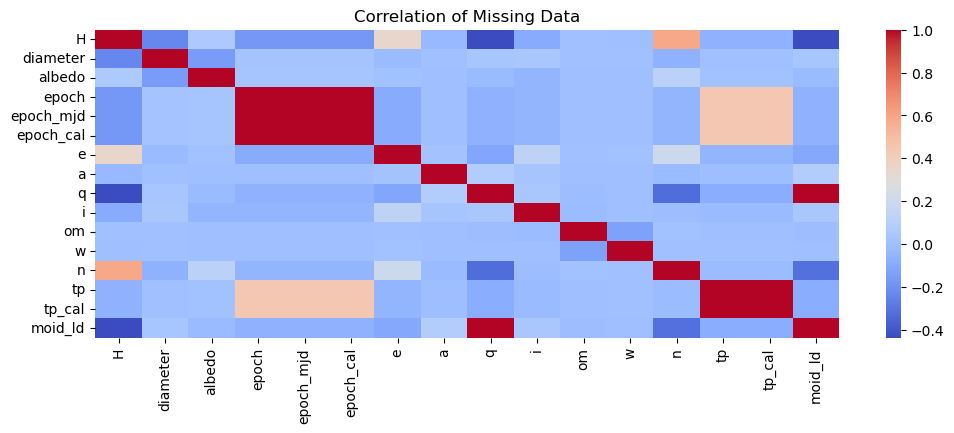

In [346]:
df_numerical = asteroids_filtered_df.select_dtypes(include='number')
correlations = df_numerical.corr()

# Display the correlation heatmap
plt.figure(figsize=(12, 4))
sns.heatmap(correlations, cmap='coolwarm')
plt.title("Correlation of Missing Data")
plt.show()

In [347]:
#Dropping highly correlated values
asteroids_filtered_df.drop(columns=['epoch_mjd', 'epoch_cal', 'tp_cal'], inplace = True)

## Data Extraction

In [348]:
# Converting the 'pha' column to binary format
asteroids_filtered_df['pha'] = asteroids_filtered_df['pha'].apply(lambda x: 1 if x == 'Y' else 0)

In [349]:
# Convert 'orbit_id' and 'pdes' to continuous types using Label Encoding
label_encoder = LabelEncoder()
asteroids_filtered_df['orbit_id'] = label_encoder.fit_transform(asteroids_filtered_df['orbit_id'].astype(str))
asteroids_filtered_df['pdes'] = label_encoder.fit_transform(asteroids_filtered_df['pdes'].astype(str))

In [350]:
asteroids_filtered_df['class'].unique()

array(['MBA', 'OMB', 'MCA', 'AMO', 'IMB', 'TJN', 'CEN', 'APO', 'ATE',
       'AST', 'TNO', 'IEO', 'HYA'], dtype=object)

In [351]:
replacement_dict = {
    "AMO": 1, "APO": 2, "AST": 3, "ATE": 4, 
    "CEN": 5, "HYA": 6, "IEO": 7, "IMB": 8,
    "MBA": 9, "MCA": 10, "OMB": 11, "TJN": 12,
    "TNO": 13
}

# Apply the lambda function to replace values in the 'class' column
asteroids_filtered_df['class'] = asteroids_filtered_df['class'].apply(lambda x: replacement_dict.get(x, x)).astype('int64')

C:\Users\MIS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\MIS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
C:\Users\MIS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\MIS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be 

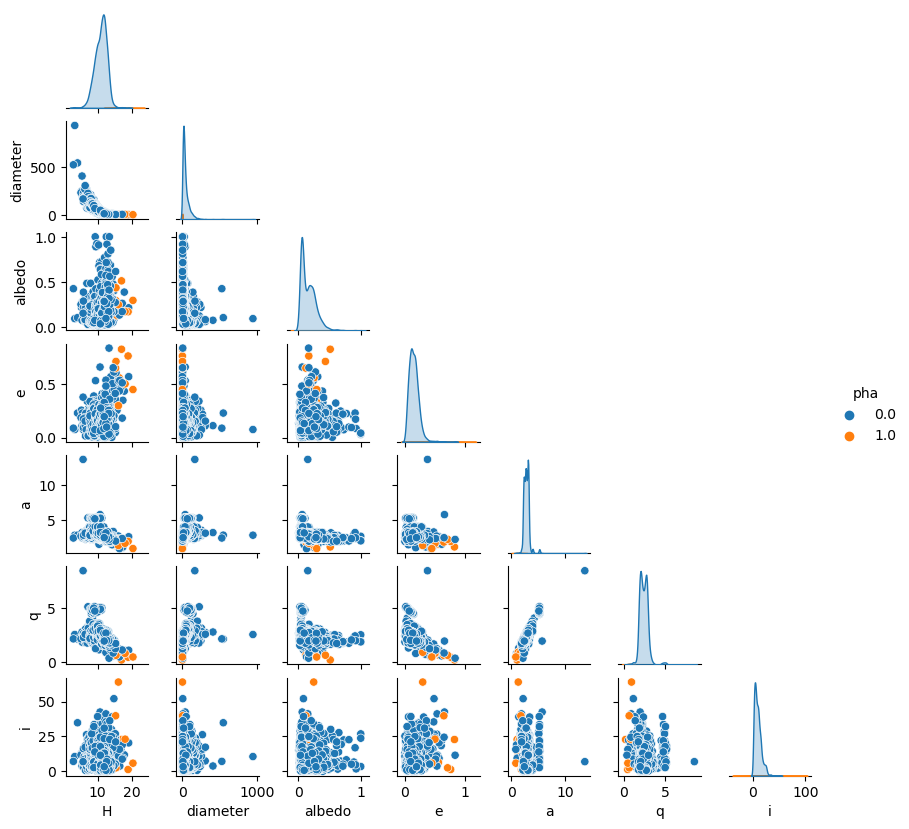

In [352]:
#Lets make pair plots to see the general structure of the data.

#make this col a category so that we can color the plots
asteroids_filtered_df = asteroids_filtered_df.astype('float')
asteroids_filtered_df['pha'] = asteroids_filtered_df['pha'].astype('category')

#draw pair plots using the first 2500 datapoints, where orange are asteroids that are hazardous
pp_asteroids = sns.pairplot(corner=True, 
                            data=asteroids_filtered_df.loc[0:2500, ['pha','H','diameter','albedo','e','a','q','i']],
                            hue=('pha'),
                            height=1.2)

##### The data looks pretty good, but some of the graphs in the pair plot need to be normalized

In [353]:
# lets normalize the data and see the difference with pairplots

#here we can log all of the numerical columns by dropping our non-numerical cols and re-add them
asteroid_normalized_df = np.log(asteroids_filtered_df.drop(['class','pha', 'pdes', 'orbit_id', 'moid_ld', 'e'],axis=1)) #normalize them
asteroid_normalized_df.loc[:,['class','pha', 'pdes', 'orbit_id', 'moid_ld', 'e']] = asteroids_filtered_df.loc[:,['class','pha', 'pdes', 'orbit_id', 'moid_ld', 'e']]

C:\Users\MIS\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:366: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


C:\Users\MIS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\MIS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
C:\Users\MIS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\MIS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be 

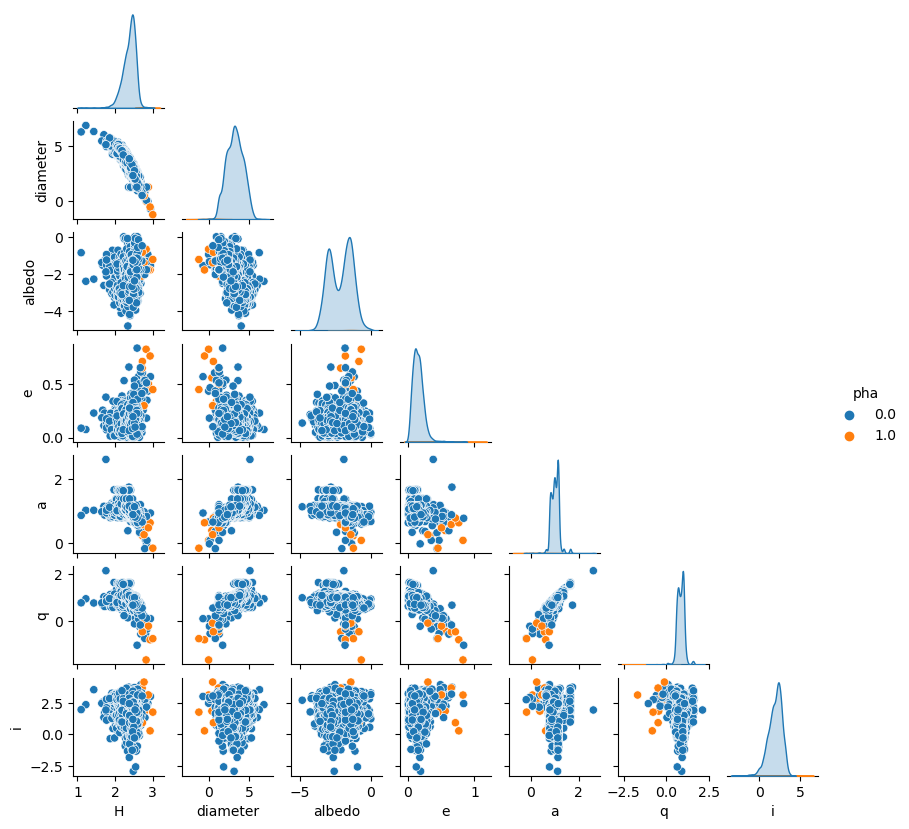

In [354]:
#draw the normalized pair plot
pp_asteroids = sns.pairplot(corner=True, 
                            data=asteroid_normalized_df.loc[0:2500, ['pha','H','diameter','albedo','e','a','q','i']],
                            hue=('pha'),
                            height=1.2)

## Data Validation and Cleansing

In [355]:
# Check for remaining missing values
asteroid_normalized_df.isnull().sum() * 100 / len(filtered_data)

H           0.658100
diameter    0.000000
albedo      0.000000
epoch       0.000000
a           0.000420
q           0.000000
i           0.000000
om          0.000000
w           0.000000
n           0.000000
tp          0.000000
class       0.000000
pha         0.000000
pdes        0.000000
orbit_id    0.000000
moid_ld     0.013338
e           0.000000
dtype: float64

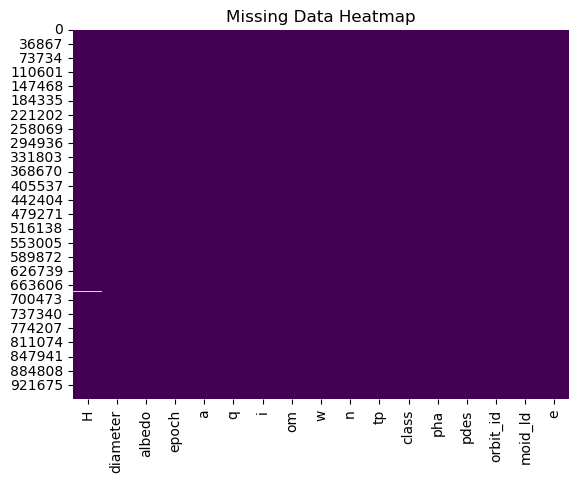

In [359]:
# Visualize the pattern of missing data
sns.heatmap(asteroid_normalized_df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

##### Performing list-wise omission to handle missing values for `H` and `moid_ld` column

In [294]:
# Drop rows with missing values in the 'H' column
asteroid_normalized_df.dropna(subset=['H', 'moid_ld', 'a'], inplace= True)

In [360]:
# Separate features and target variable
features = asteroid_normalized_df.drop(columns=['pha'])
target = asteroid_normalized_df['pha']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (766819, 16)
X_test shape: (191705, 16)
y_train shape: (766819,)
y_test shape: (191705,)


In [297]:
# Check for infinity values
infinity_mask = np.isinf(X_train.to_numpy())

# Find rows with infinity values
rows_with_infinity = X_train[infinity_mask.any(axis=1)]

print("Rows with infinity values:")
print(rows_with_infinity)

Rows with infinity values:
Empty DataFrame
Columns: [H, diameter, albedo, epoch, a, q, i, om, w, n, tp, class, pdes, orbit_id, moid_ld, e]
Index: []


## Data Analysis

<b>Reasons for choosing RandomForestClassifier</b>
* This dataset contains multiple features with varying scales which Random Forest can handle without many pre-processing steps.
* In this case, we have a complex, non-linear relationship between `e, a, q, i, H` where Random Forest can effectively capture non-linear patterns using the decision trees concept.
* Random forests are less overfitting-prone compared to the individual decision trees that average the results of many trees, which mitigates the impact of noisy data and outliers.

<b> RandomForestClassfier Working </b>
* The RandomForestClassifier works on the concept of decision trees, it creates various subsets of the training data and a random subset of features.
* These trees then make predictions and based on the final prediction select the majority vote among all trees.

In [298]:
# Train a RandomForestClassifier to predict 'pha' values
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)


# Predict the 'pha' values for the test set
rf_classifier_pred = rf_classifier.predict(X_test)

In [299]:
# Evaluate the model's performance
print("Accuracy Score:", accuracy_score(y_test, rf_classifier_pred))

Accuracy Score: 0.9999422347788642


In [300]:
# Checking the predictions with actual values
results = pd.DataFrame({'Actual': y_test, 'Predicted': rf_classifier_pred})
print(results.head())

       Actual  Predicted
580029    0.0        0.0
673689    0.0        0.0
363193    0.0        0.0
650067    0.0        0.0
203688    0.0        0.0


In [317]:
# Get feature importances
feature_importances = rf_classifier.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

print('Feature Importances:')
print(importance_df)

Feature Importances:
     Feature  Importance
0          H    0.350021
14   moid_ld    0.300184
12      pdes    0.079322
5          q    0.071741
15         e    0.040098
11     class    0.031810
6          i    0.031115
13  orbit_id    0.019271
3      epoch    0.016702
9          n    0.014542
4          a    0.012242
10        tp    0.010448
8          w    0.008045
1   diameter    0.005609
7         om    0.005020
2     albedo    0.003831


# Training with different dataset

In [302]:
def generate_random_dataset(fraction=0.05, fraction2=0.5, dataset=df_asteroid_normalized):
    asteroid_sort = dataset.sort_values('pha', ascending=False)
    hazard = asteroid_sort[:181]
    non_hazard = asteroid_sort[182:]
    test_set = pd.concat([hazard.sample(frac=fraction2),non_hazard.sample(frac=fraction)])
    test_set = test_set.sample(frac=1)
    feat = test_set.columns
    feat = feat.drop('pha')
    x_rand = test_set.loc[:,feat]
    y_rand = test_set['pha']
    return x_rand, y_rand

In [303]:
#Here we create new datasets from the original one by randomly selecting datapoints.
#We create these new sets to have a better ratio of hazardous to non-hazardous

#This function means that we are using 5% of the non-hazardous asteroid data (fraction=.05) (6548 datapoints)
#and we are using 100% of the hazardous asteroid data (fraction2=1) (181 datapoints)

X,Y = generate_random_dataset(fraction=.05, fraction2=1, dataset=asteroid_normalized_df) 

Xnew_train, Xnew_test, ynew_train, ynew_test = train_test_split(X, Y, test_size=0.3)

In [304]:
# Train a RandomForestClassifier to predict 'pha' values
rf_new_classifier = RandomForestClassifier(random_state=42)
rf_new_classifier.fit(Xnew_train, ynew_train)

# Predict the 'pha' values for the test set
new_rf_classifier_pred = rf_classifier.predict(Xnew_test)

In [305]:
# Evaluate the model's performance
print("Random Forest Classifier Accuracy Score:", accuracy_score(y_test, rf_classifier_pred))
print("Random Forest Classifier Accuracy Score with new training and testing set:", accuracy_score(ynew_test, new_rf_classifier_pred))

Random Forest Classifier Accuracy Score: 0.9999422347788642
Random Forest Classifier Accuracy Score with new training and testing set: 0.9999302358029859


In [318]:
# Get feature importances
feature_importances = rf_new_classifier.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

print('Feature Importances:')
print(importance_df)

Feature Importances:
     Feature  Importance
0          H    0.295063
14   moid_ld    0.238802
5          q    0.133057
11     class    0.066093
15         e    0.061729
12      pdes    0.057274
6          i    0.031175
9          n    0.025591
4          a    0.021962
13  orbit_id    0.018916
10        tp    0.013329
8          w    0.010355
3      epoch    0.010089
7         om    0.009373
1   diameter    0.005623
2     albedo    0.001570
